# Problem Statement:

Given a set of attributes for an Individual, determine if a credit line should be extended to them. If so, what should the repayment terms be in business recommendations?

# Import required Libraries

In [4]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import datetime

In [5]:
!pip install simple_colors

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
from simple_colors import *

# Load the Dataset

In [7]:
# Load the dataset
data_df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/003/549/original/logistic_regression.csv?1651045921')

# Statistical Summary of the Dataset

In [8]:
# Meta data of dataset
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [9]:
# Description of the dataset
data_df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [10]:
data_df.dtypes

loan_amnt               float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
dti                     float64
earliest_cr_line         object
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status      object
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
address                  object
dtype: object

In [11]:
# Shape of the dataset
print("Given dataset contains {0} Rows and {1} Columns ".format(data_df.shape[0], data_df.shape[1]))

Given dataset contains 396030 Rows and 27 Columns 


In [12]:
# Unique value counts
data_df.nunique()

loan_amnt                 1397
term                         2
int_rate                   566
installment              55706
grade                        7
sub_grade                   35
emp_title               173105
emp_length                  11
home_ownership               6
annual_inc               27197
verification_status          3
issue_d                    115
loan_status                  2
purpose                     14
title                    48817
dti                       4262
earliest_cr_line           684
open_acc                    61
pub_rec                     20
revol_bal                55622
revol_util                1226
total_acc                  118
initial_list_status          2
application_type             3
mort_acc                    33
pub_rec_bankruptcies         9
address                 393700
dtype: int64

In [13]:
# Count of each object variables 
def display_value_counts(df):
  for col in df.astype('object').columns:
    if len(df[col].value_counts())<10:
      print(blue(col, ['bold']))
      print(df[col].value_counts().to_string(),'\n')

In [14]:
# Call the method to display the value counts
display_value_counts(data_df)

term
 36 months    302005
 60 months     94025 

grade
B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054 

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3 

verification_status
Verified           139563
Source Verified    131385
Not Verified       125082 

loan_status
Fully Paid     318357
Charged Off     77673 

initial_list_status
f    238066
w    157964 

application_type
INDIVIDUAL    395319
JOINT            425
DIRECT_PAY       286 

pub_rec_bankruptcies
0.0    350380
1.0     42790
2.0      1847
3.0       351
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2 



#### **Observations**: 
*   Loan Term 36 months is more predominant than 60 months
*   Grade B and C has more counts than other grades
*   In terms of Ownership, 'Mortgage' tops the list
*   3/4th of the Customers have fully paid back the loan
*   "Individual" seems to be the popular amongst the application type  
*   Naturally 'Verified' status are high in number than the 'not verified'




In [15]:
data_df.describe(include='object').T

,count,unique,top,freq
term,396030,2,36 months,302005
grade,396030,7,B,116018
sub_grade,396030,35,B3,26655
emp_title,373103,173105,Teacher,4389
emp_length,377729,11,10+ years,126041
home_ownership,396030,6,MORTGAGE,198348
verification_status,396030,3,Verified,139563
issue_d,396030,115,Oct-2014,14846
loan_status,396030,2,Fully Paid,318357
purpose,396030,14,debt_consolidation,234507


# Data Pre-Processing and Data Engineering

### Missing Values check

In [16]:
# Method to check missing values
def check_for_missing_values(data):
    total_missing_df = data.isna().sum().sort_values(ascending = False)
    percentage_missing_df = ((data.isna().sum()/len(data)*100)).sort_values(ascending = False)
    missingDF = pd.concat([total_missing_df, round(percentage_missing_df, 2)],axis = 1, keys=['Total', 'Percent'])
    return missingDF

In [17]:
# Display the columns those who have Missing Values
missing_data = check_for_missing_values(data_df)
print(blue("Following Features have Missing Values \n", ['bold']))
missing_data[missing_data["Total"]>0]

Following Features have Missing Values 



,Total,Percent
mort_acc,37795,9.54
emp_title,22927,5.79
emp_length,18301,4.62
title,1755,0.44
pub_rec_bankruptcies,535,0.14
revol_util,276,0.07


#### **Observation**: 
*   Clearly 'mort_acc', 'emp_title', and 'emp_length' have significant null values. Remaining features have negligible null values which can be dropped.
*   Null values in 'emp_title' can be filled with 'Unknown title'
*   Null values in 'emp_length' can be imputed with mean value
*   'mort_acc' is number of mortgage accounts. We have to impute it with median to it's null values

In [18]:
# Take a working copy of the dataset
work_df = data_df.copy()

In [19]:
missing_data = check_for_missing_values(work_df)
print(blue("Following Features have Missing Values \n", ['bold']))
missing_data[missing_data["Total"]>0]

Following Features have Missing Values 



,Total,Percent
mort_acc,37795,9.54
emp_title,22927,5.79
emp_length,18301,4.62
title,1755,0.44
pub_rec_bankruptcies,535,0.14
revol_util,276,0.07


In [20]:
# Imputing missing values of 'emp_title' with 'unknown_title'
work_df['emp_title'].fillna('unknown_title', inplace=True)

In [21]:
# Imputing null values of 'emp_length' with forward fill method
work_df['emp_length'] = work_df['emp_length'].fillna(method='ffill')

In [22]:
# Filling null values of 'mort_acc' with median value of 'mort_acc'
work_df['mort_acc'].fillna(work_df['mort_acc'].median(), inplace=True)

In [23]:
# Check for Missing Values now after imputing bigger ones
missing_data = check_for_missing_values(work_df)
print(blue("Following Features have Missing Values \n", ['bold']))
missing_data[missing_data["Total"]>0]

Following Features have Missing Values 



,Total,Percent
title,1755,0.44
pub_rec_bankruptcies,535,0.14
revol_util,276,0.07


In [24]:
def pub_rec(val):
  if val == 0.0:
    return 0
  else:
    return 1

In [25]:
def mort_acc(val):
  if val == 0.0:
    return 0
  elif val >= 1.0:
    return 1
  else:
    return val

In [26]:
def pub_rec_bankruptcies(val):
  if val == 0.0:
    return 0
  elif val >= 1.0:
    return 1
  else: 
    return val

In [27]:
work_df['pub_rec'] = work_df.pub_rec.apply(pub_rec)

In [28]:
work_df['mort_acc'] = work_df.mort_acc.apply(mort_acc)

In [29]:
work_df['pub_rec_bankruptcies'] = work_df.pub_rec_bankruptcies.apply(pub_rec_bankruptcies)

In [30]:
missing_data = check_for_missing_values(work_df)
print(blue("Following Features have Missing Values \n", ['bold']))
missing_data[missing_data["Total"]>0]

Following Features have Missing Values 



,Total,Percent
title,1755,0.44
pub_rec_bankruptcies,535,0.14
revol_util,276,0.07


In [31]:
# As the above columns have compartively less null values, these can be dropped. 
work_df = work_df.dropna()

In [32]:
work_df.isna().sum() / len(work_df) * 100

loan_amnt               0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
sub_grade               0.0
emp_title               0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
title                   0.0
dti                     0.0
earliest_cr_line        0.0
open_acc                0.0
pub_rec                 0.0
revol_bal               0.0
revol_util              0.0
total_acc               0.0
initial_list_status     0.0
application_type        0.0
mort_acc                0.0
pub_rec_bankruptcies    0.0
address                 0.0
dtype: float64

In [33]:
# Check for duplicates
dup_rows = work_df[work_df.duplicated()]
print(blue("# of duplicate rows: {0} ".format(dup_rows.shape[0])))

# of duplicate rows: 0 


##### **Observation**: Now our dataset is clear without any null/duplicate values.

### Feature Engineering

#### Data Cleaning

In [34]:
work_df['emp_length'].value_counts()

10+ years    131320
2 years       37294
< 1 year      33030
3 years       32987
5 years       27662
1 year        26856
4 years       24908
7 years       21766
6 years       21698
8 years       19979
9 years       15965
Name: emp_length, dtype: int64

In [35]:
# Convert the emp_length to a numerical column
# Before converting the datatype, let's make <1 yrs as 0 years and 10+ yrs to 10 years
work_df['emp_length'] = work_df['emp_length'].replace(['< 1 year'], '0 year')
work_df['emp_length'] = work_df['emp_length'].replace(['10+ years'], '10 years')

In [36]:
work_df['emp_length'].value_counts()

10 years    131320
2 years      37294
0 year       33030
3 years      32987
5 years      27662
1 year       26856
4 years      24908
7 years      21766
6 years      21698
8 years      19979
9 years      15965
Name: emp_length, dtype: int64

In [37]:
work_df[['emp_duration', 'emp_years']] = work_df['emp_length'].str.split(' ', expand=True)

In [38]:
work_df.drop(['emp_length', 'emp_years'], axis='columns', inplace=True)

In [39]:
work_df['emp_duration'].value_counts()

10    131320
2      37294
0      33030
3      32987
5      27662
1      26856
4      24908
7      21766
6      21698
8      19979
9      15965
Name: emp_duration, dtype: int64

In [40]:
work_df['emp_duration'] = work_df['emp_duration'].astype(int)

In [41]:
work_df['home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'ANY', 'NONE'], dtype=object)

In [42]:
work_df['home_ownership'].replace({"NONE":"OTHER", "ANY": "OTHER"}, inplace=True)

In [43]:
work_df['home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER'], dtype=object)

In [44]:
# Convert target variable - Loan Status Fully Paid is 0 and Loan Status Charged Off is 1.
work_df["loan_status"] = work_df["loan_status"].map({"Fully Paid":0, "Charged Off":1})

In [45]:
# Let's convert 'issue_dt' and 'earliest_cr_line' into datatime type
work_df['issue_d'] = work_df['issue_d'].astype('datetime64[ns]')
work_df['earliest_cr_line'] = work_df['earliest_cr_line'].astype('datetime64[ns]')

In [46]:
now = datetime.datetime.now()
work_df['current_date'] = pd.Series([now.date() for x in range(len(work_df.index))])
work_df['current_date'] = work_df['current_date'].astype('datetime64[ns]')
work_df['credit_line_age'] = (work_df['current_date'] - work_df['earliest_cr_line']) / np.timedelta64(1, 'D')
work_df['loan_age'] = (work_df['current_date'] - work_df['issue_d']) / np.timedelta64(1, 'D')
work_df.head()


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,home_ownership,annual_inc,verification_status,...,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,emp_duration,current_date,credit_line_age,loan_age
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,RENT,117000.0,Not Verified,...,25.0,w,INDIVIDUAL,0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",10,2023-02-05,11937.0,2957.0
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,MORTGAGE,65000.0,Not Verified,...,27.0,f,INDIVIDUAL,1,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",4,2023-02-05,6793.0,2957.0
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,RENT,43057.0,Source Verified,...,26.0,f,INDIVIDUAL,0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",0,2023-02-05,5667.0,2957.0
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,RENT,54000.0,Not Verified,...,13.0,f,INDIVIDUAL,0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",6,2023-02-05,6001.0,3018.0
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,MORTGAGE,55000.0,Verified,...,43.0,f,INDIVIDUAL,1,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",9,2023-02-05,8742.0,3597.0


In [47]:
work_df.drop(['current_date', 'earliest_cr_line', 'issue_d'], axis='columns', inplace=True)

In [48]:
# Drop the address column as it may not have much significant for our analysis
work_df.drop(['address'], axis='columns', inplace=True)

In [49]:
# Let's drop the 'title' column as well
work_df.drop(['title'], axis='columns', inplace=True)

In [50]:
term_values = {' 36 months': 36, ' 60 months': 60}
work_df['term'] = work_df['term'].map(term_values)

In [51]:
# Sub grade is secondary level categorization of grade, so we can ignore the first part and convert it to int type
work_df['sub_grade'] = work_df['sub_grade'].str[1:]

In [52]:
work_df['sub_grade'] = work_df['sub_grade'].astype(int)

In [53]:
# Segregate Categorical Features
cat_features = list(work_df.select_dtypes('object').columns)
for col in cat_features:
  print('Unique values in {0} are {1}'.format(col, work_df[col].unique()))

Unique values in grade are ['B' 'A' 'C' 'E' 'D' 'F' 'G']
Unique values in emp_title are ['Marketing' 'Credit analyst ' 'Statistician' ...
 "Michael's Arts & Crafts" 'licensed bankere' 'Gracon Services, Inc']
Unique values in home_ownership are ['RENT' 'MORTGAGE' 'OWN' 'OTHER']
Unique values in verification_status are ['Not Verified' 'Source Verified' 'Verified']
Unique values in purpose are ['vacation' 'debt_consolidation' 'credit_card' 'home_improvement'
 'small_business' 'major_purchase' 'other' 'medical' 'wedding' 'car'
 'moving' 'house' 'educational' 'renewable_energy']
Unique values in initial_list_status are ['w' 'f']
Unique values in application_type are ['INDIVIDUAL' 'JOINT' 'DIRECT_PAY']


### Outliers check

In [54]:
work_df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,393465.0,14117.269960,8353.190693,500.00,8000.00,12000.00,20000.00,40000.00
term,393465.0,41.699577,10.212979,36.00,36.00,36.00,36.00,60.00
int_rate,393465.0,13.638728,4.468866,5.32,10.49,13.33,16.49,30.99
installment,393465.0,431.946979,250.582348,16.08,250.33,375.43,567.49,1533.81
sub_grade,393465.0,2.972028,1.406815,1.00,2.00,3.00,4.00,5.00
annual_inc,393465.0,74212.294265,61628.502516,0.00,45000.00,64000.00,90000.00,8706582.00
loan_status,393465.0,0.196190,0.397115,0.00,0.00,0.00,0.00,1.00
dti,393465.0,17.383396,18.061993,0.00,11.29,16.91,22.98,9999.00
open_acc,393465.0,11.317601,5.133143,1.00,8.00,10.00,14.00,90.00
pub_rec,393465.0,0.145860,0.352967,0.00,0.00,0.00,0.00,1.00


#### **Observation**: 
Loan Amount, Installment, Annual Income , revol_bal : These columns have large differnece b/w mean and median. This means outliers exist in these features.

In [55]:
# Segregate Numerical Features
num_features = work_df.select_dtypes('number')
num_features.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'annual_inc', 'loan_status', 'dti', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies',
       'emp_duration', 'credit_line_age', 'loan_age'],
      dtype='object')

In [138]:
def check_outliers(df, col):
  global lower, upper
  q1 = np.quantile(df[col], 0.25)
  q3 = np.quantile(df[col], 0.75)
  iqr = q3 - q1
  cut_off = iqr * 1.5

  lower = q1 - cut_off
  upper = q3 + cut_off 

  lower_outliers_df = df[df[col] < lower]
  upper_outliers_df = df[df[col] > upper]
  total_outliers = lower_outliers_df.shape[0] + upper_outliers_df.shape[0]

  print("For the Feature - ", col)
  print("IQR value is:", round(iqr,2))
  print("Lower bound value is: ", round(lower,2))
  print("Upper bound value is: ", round(upper,2))
  print("Number of outliers are: ", lower_outliers_df.shape[0] + upper_outliers_df.shape[0])
  print("Percentage is: ", round((total_outliers/df.shape[0])*100, 2), "% \n")

In [139]:
def print_outliers(df):
  cols = df.select_dtypes(['int64', 'float64']).columns
  for col in cols:
    check_outliers(df, col)

In [140]:
print_outliers(work_df)

For the Feature -  loan_amnt
IQR value is: 9000.0
Lower bound value is:  -7500.0
Upper bound value is:  28500.0
Number of outliers are:  1386
Percentage is:  0.57 % 

For the Feature -  term
IQR value is: 0.0
Lower bound value is:  36.0
Upper bound value is:  36.0
Number of outliers are:  0
Percentage is:  0.0 % 

For the Feature -  int_rate
IQR value is: 5.51
Lower bound value is:  1.45
Upper bound value is:  23.48
Number of outliers are:  1650
Percentage is:  0.68 % 

For the Feature -  installment
IQR value is: 278.16
Lower bound value is:  -208.71
Upper bound value is:  903.95
Number of outliers are:  3141
Percentage is:  1.29 % 

For the Feature -  sub_grade
IQR value is: 2.0
Lower bound value is:  -1.0
Upper bound value is:  7.0
Number of outliers are:  0
Percentage is:  0.0 % 

For the Feature -  annual_inc
IQR value is: 36000.0
Lower bound value is:  -13000.0
Upper bound value is:  131000.0
Number of outliers are:  3430
Percentage is:  1.41 % 

For the Feature -  loan_status
IQ

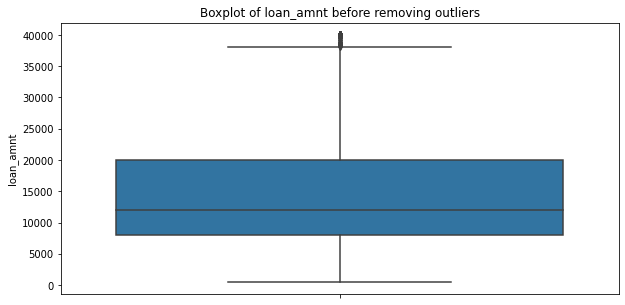

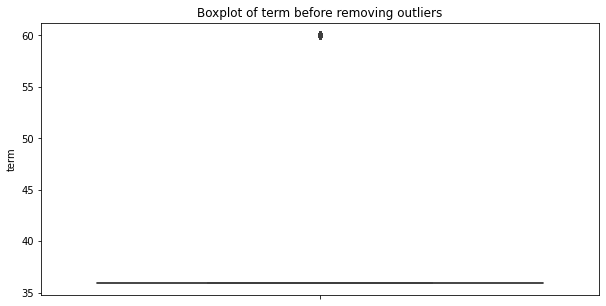

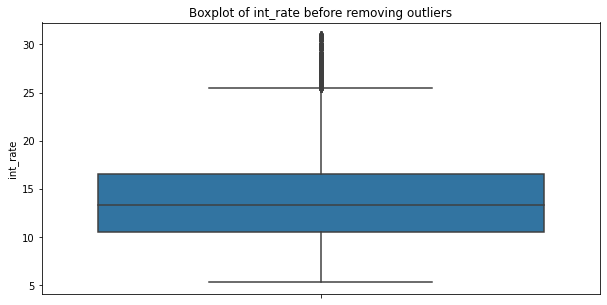

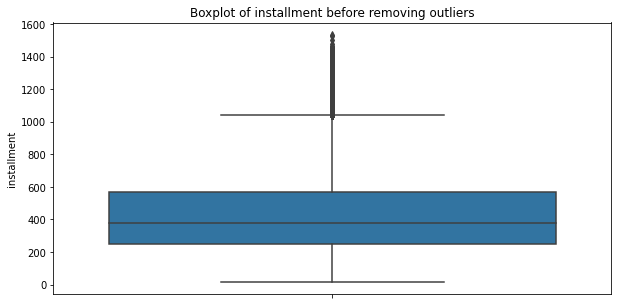

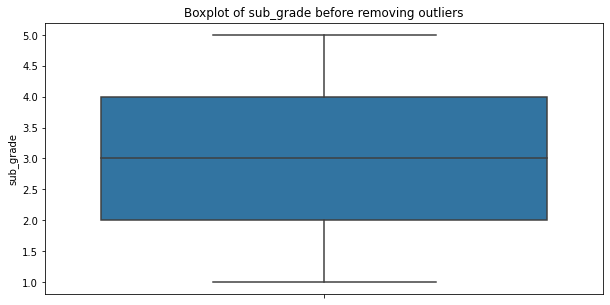

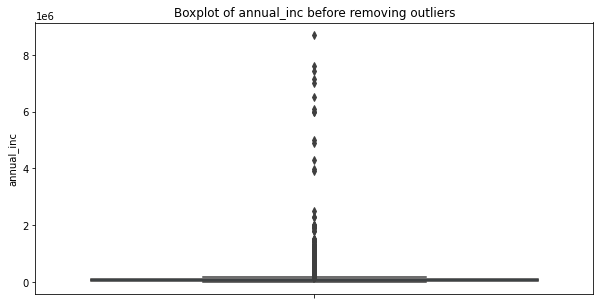

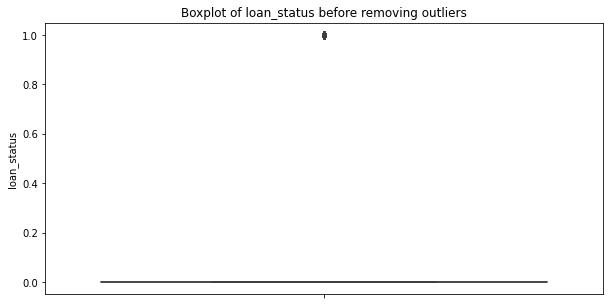

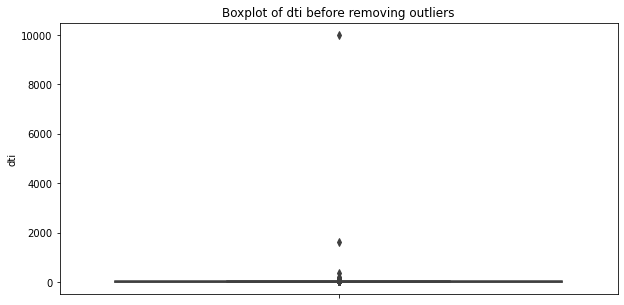

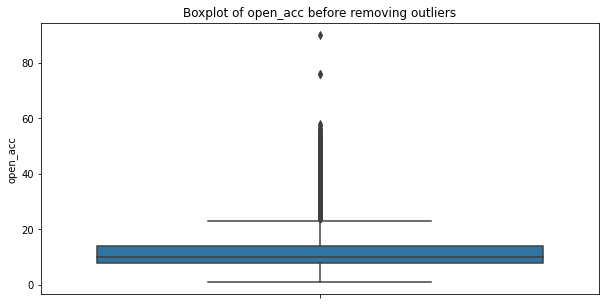

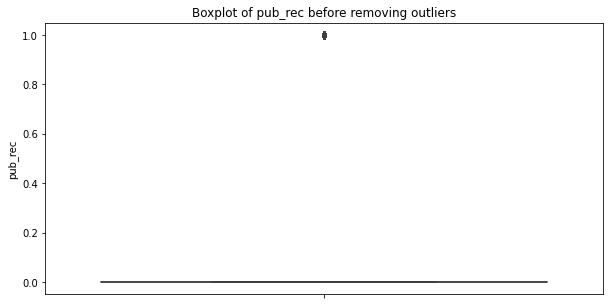

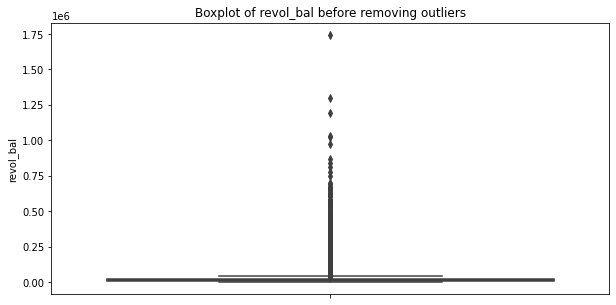

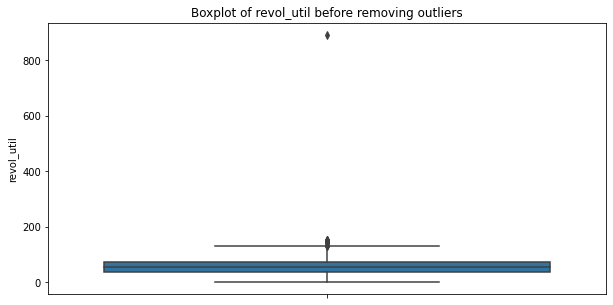

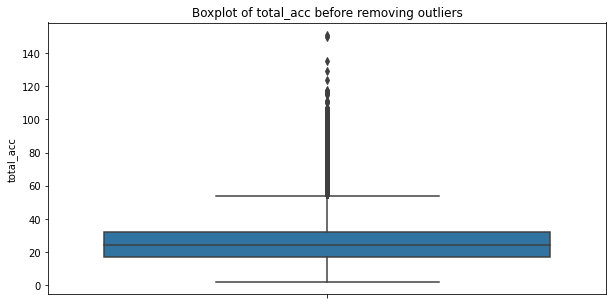

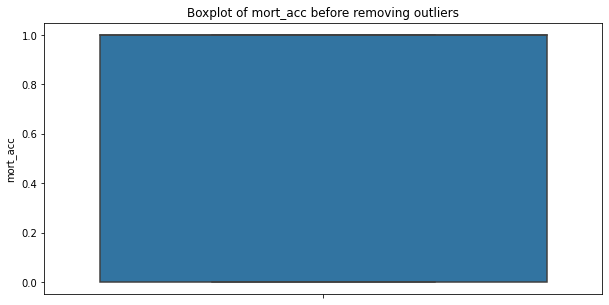

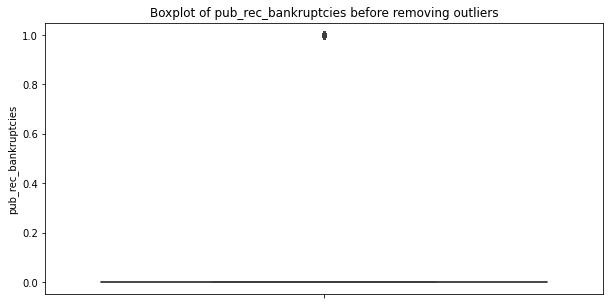

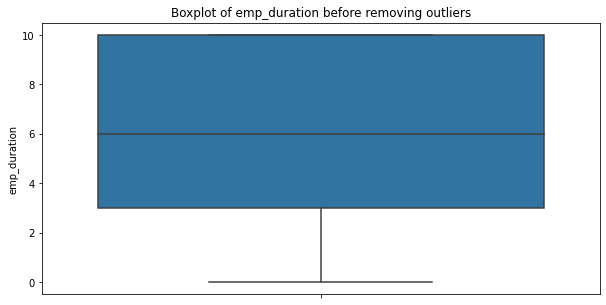

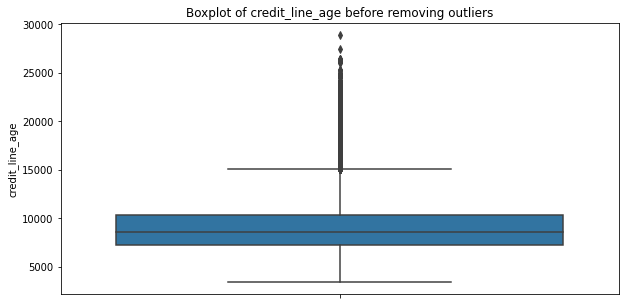

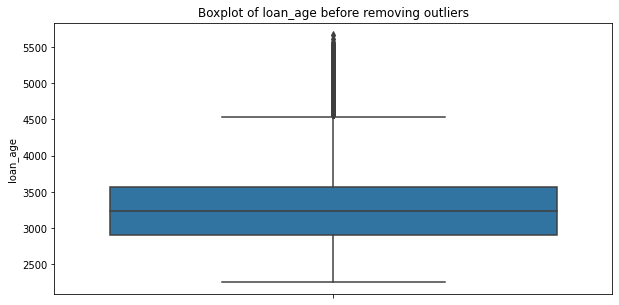

In [56]:
# Box plots before removing outliers
for col in num_features:
  plt.figure(figsize=(10, 5))
  sns.boxplot(y=work_df[col])
  plt.title(f"Boxplot of {col} before removing outliers")

  plt.show()

In [141]:
outliers_list = []
for col in num_features.columns:
  # print(num_features[col].mean())
  mean_value = num_features[col].mean()
  median_value = num_features[col].median()
  mean_median_diff = round(mean_value - median_value,2)
  if mean_median_diff > 5:
    outliers_list.append(col)
  print('{0} has mean_median_diff of {1}'.format(col, mean_median_diff))
print(outliers_list)

loan_amnt has mean_median_diff of 2117.27
term has mean_median_diff of 5.7
int_rate has mean_median_diff of 0.31
installment has mean_median_diff of 56.52
sub_grade has mean_median_diff of -0.03
annual_inc has mean_median_diff of 10212.29
loan_status has mean_median_diff of 0.2
dti has mean_median_diff of 0.47
open_acc has mean_median_diff of 1.32
pub_rec has mean_median_diff of 0.15
revol_bal has mean_median_diff of 4655.76
revol_util has mean_median_diff of -1.07
total_acc has mean_median_diff of 1.43
mort_acc has mean_median_diff of -0.35
pub_rec_bankruptcies has mean_median_diff of 0.11
emp_duration has mean_median_diff of -0.06
credit_line_age has mean_median_diff of 485.65
loan_age has mean_median_diff of 57.64
['loan_amnt', 'term', 'installment', 'annual_inc', 'revol_bal', 'credit_line_age', 'loan_age']


In [58]:
# Treat Outliers using Capping method
for col in outliers_list:
  percentiles = work_df[col].quantile([0.01, 0.99]).values
  work_df[col] = np.clip(work_df[col], percentiles[0], percentiles[1])

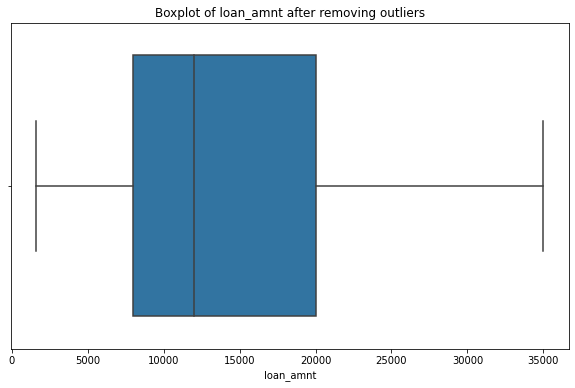

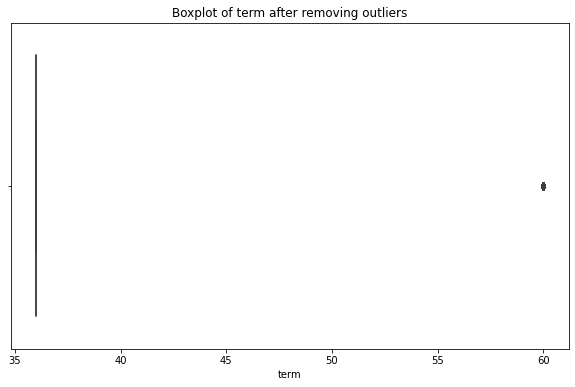

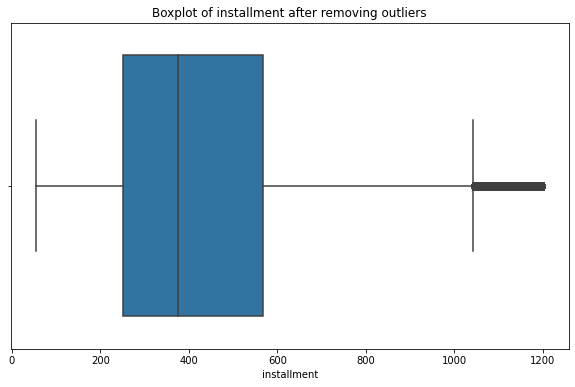

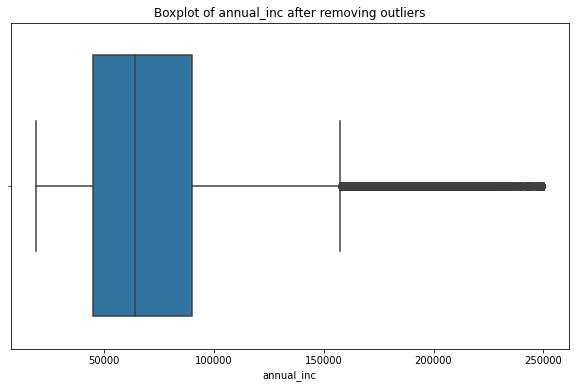

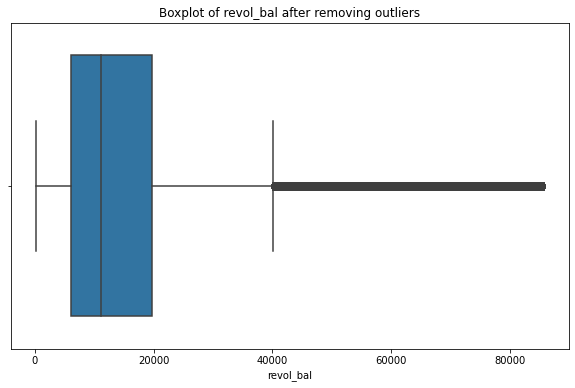

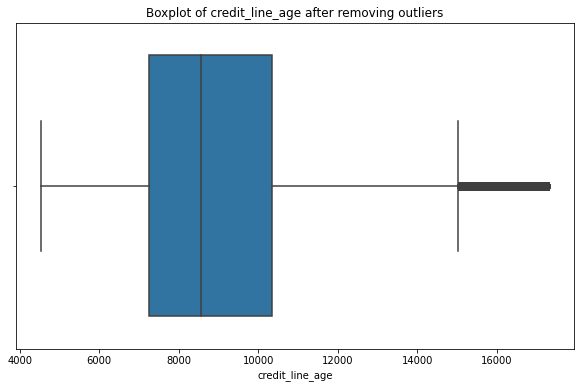

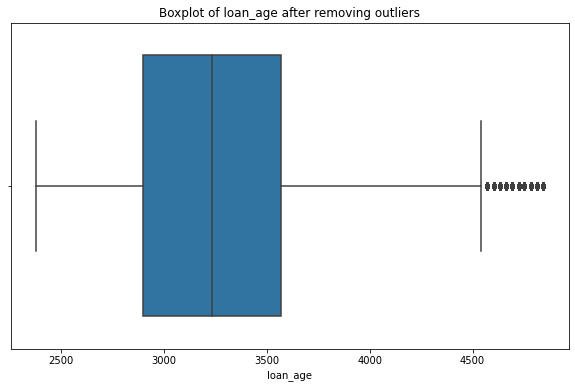

In [59]:
# Box plots after removing outliers
for i, j in enumerate(outliers_list):
  plt.figure(figsize=(10, 6))
  sns.boxplot(work_df[j])
  plt.title(f"Boxplot of {j} after removing outliers")

  plt.show()

In [142]:
# Treat outliers using IQR method
def treat_outlier(qwerty):
  median = qwerty.median()
  q1 = qwerty.quantile(0.25)
  q3 = qwerty.quantile(0.75)
  IQR = q3 - q1
  lower_bound = q1 - 1.5*IQR
  upper_bound = q3 + 1.5*IQR

  qwerty = np.where(qwerty>upper_bound, upper_bound, qwerty)
  qwerty = np.where(qwerty<lower_bound, lower_bound, qwerty)

  return qwerty

In [143]:
ot_df = work_df.copy()

In [145]:
for col in num_features:
  ot_df[col] = treat_outlier(ot_df[col])

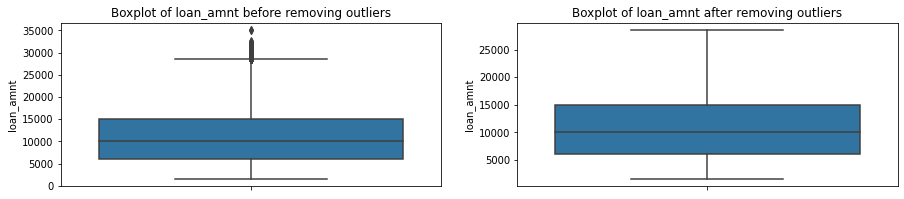

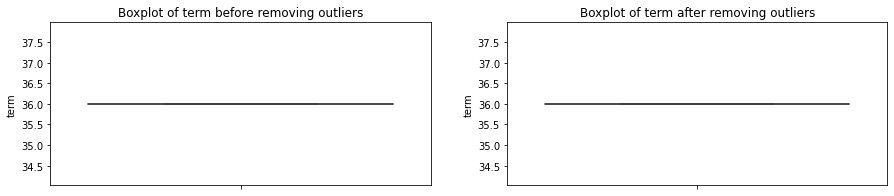

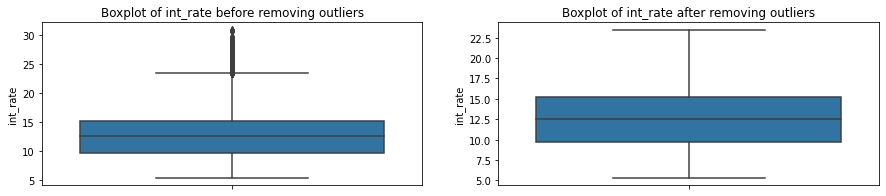

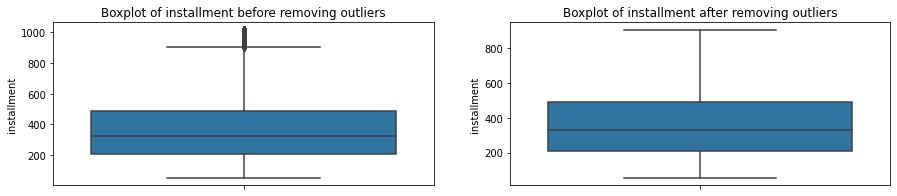

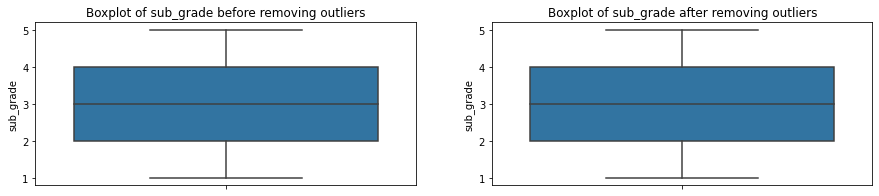

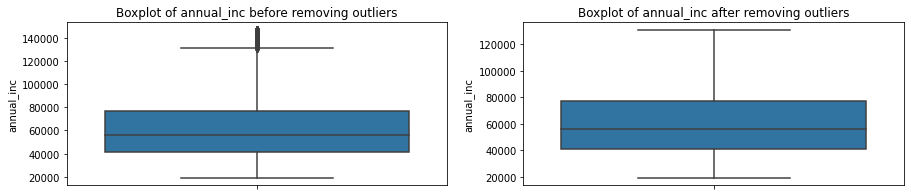

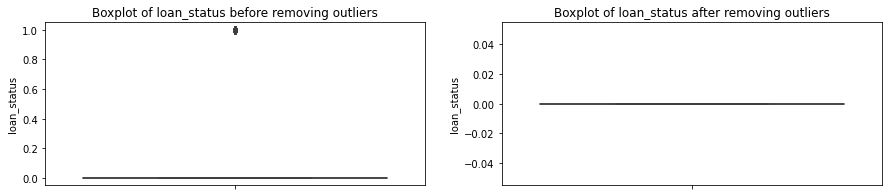

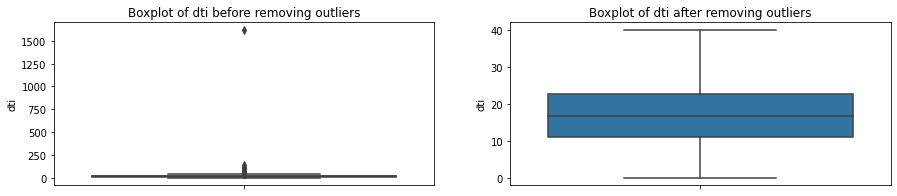

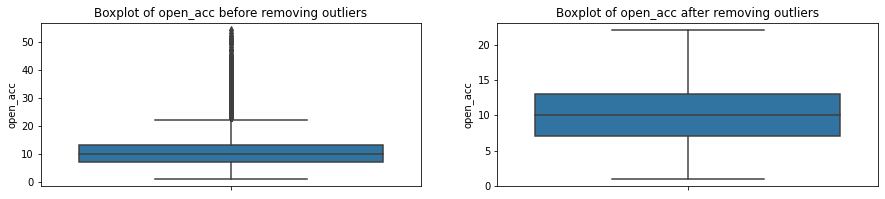

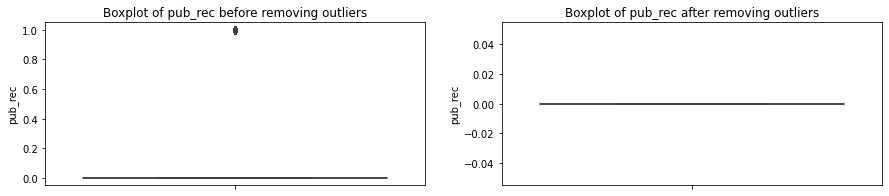

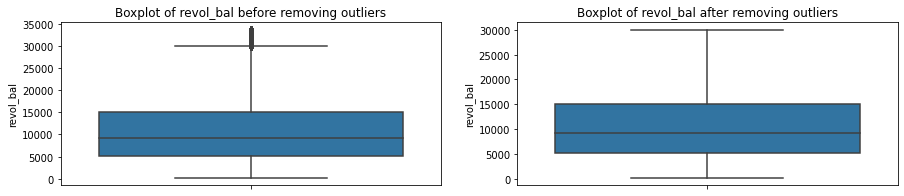

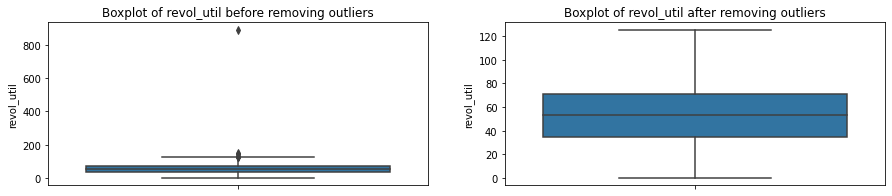

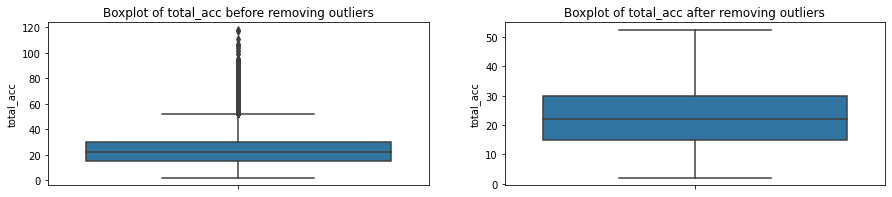

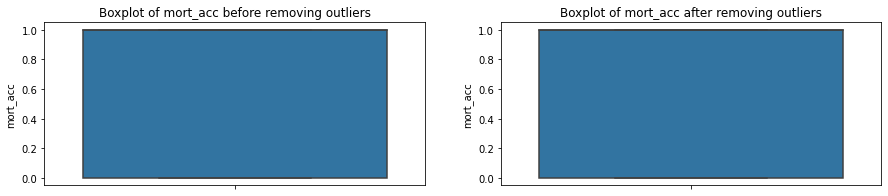

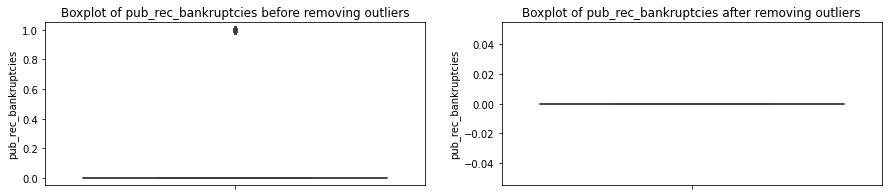

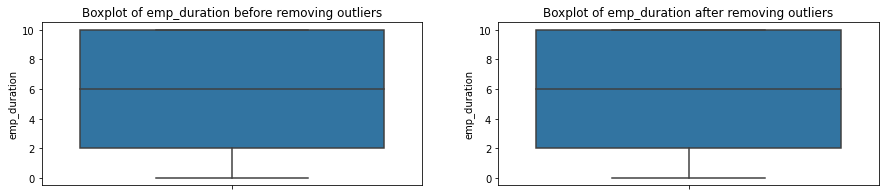

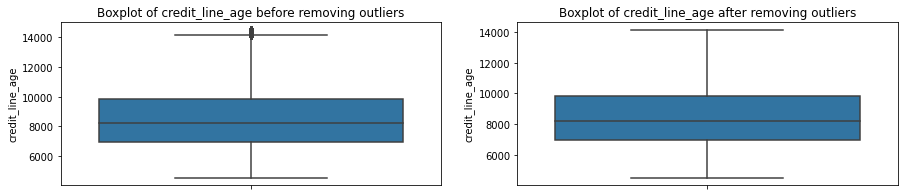

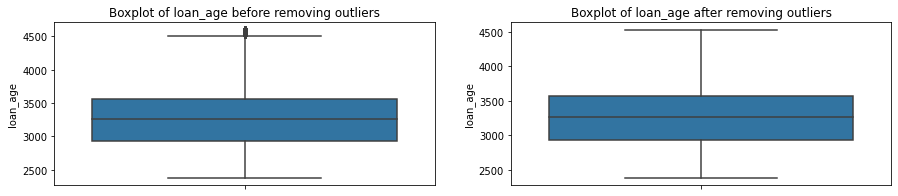

In [148]:
for col in num_features:
  plt.figure(figsize=(15, 3))
  plt.subplot(121)
  sns.boxplot(y=work_df[col])
  plt.title(f"Boxplot of {col} before removing outliers")
  plt.subplot(122)
  sns.boxplot(y=ot_df[col])
  plt.title(f"Boxplot of {col} after removing outliers")

  plt.show()

### Exploratory Data Analysis (EDA)

In [63]:
work_df.groupby(by = "loan_status")["loan_amnt"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,204092.0,10927.141069,6072.380153,1600.0,6000.0,10000.0,15000.0,35000.0
1,39362.0,10705.925131,5840.694217,1600.0,6000.0,10000.0,14650.0,32350.0


##### Observation:
High percentage of the lons were fully paid

In [95]:
work_df['loan_amnt'].mean()

10891.374551249928

In [97]:
work_df.annual_inc.mean()

61362.18885333576

In [99]:
loanAmt_vs_Income = work_df.groupby(['annual_inc', 'loan_amnt'])

In [81]:
loanAmt_vs_Income.size().sort_values(ascending=False).head(5)

annual_inc  loan_amnt
60000.0     10000.0      1074
50000.0     10000.0      1033
40000.0     10000.0       874
45000.0     10000.0       796
60000.0     12000.0       781
dtype: int64

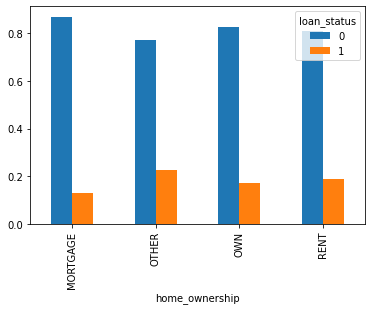

In [ ]:
pd.crosstab(columns = work_df["loan_status"],
           index=work_df["home_ownership"], 
           normalize="index").plot(kind="bar")

In [ ]:
work_df.groupby(by = "loan_status")["home_ownership"].describe()

,count,unique,top,freq
loan_status,,,,
0,204092,4,MORTGAGE,93616
1,39362,4,RENT,21311


##### **Observation**: The major home ownership types are - Mortgage and Rental. 

In [ ]:
work_df.groupby(by = "loan_status")["int_rate"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,204092.0,12.313627,3.852737,5.32,9.17,12.12,14.65,30.99
1,39362.0,14.377174,3.805262,5.32,11.99,14.09,16.99,29.67


In [ ]:
for col in work_df.columns:
  print(blue("Loan Status vs {0} \n", ['bold']).format(col))
  print(work_df.groupby(by='loan_status')[col].describe().round(1), '\n')

Loan Status vs loan_amnt 

                count     mean     std     min     25%      50%      75%  \
loan_status                                                                
0            204092.0  10927.1  6072.4  1600.0  6000.0  10000.0  15000.0   
1             39362.0  10705.9  5840.7  1600.0  6000.0  10000.0  14650.0   

                 max  
loan_status           
0            35000.0  
1            32350.0   

Loan Status vs term 

                count  mean  std   min   25%   50%   75%   max
loan_status                                                   
0            204092.0  36.0  0.0  36.0  36.0  36.0  36.0  36.0
1             39362.0  36.0  0.0  36.0  36.0  36.0  36.0  36.0 

Loan Status vs int_rate 

                count  mean  std  min   25%   50%   75%   max
loan_status                                                  
0            204092.0  12.3  3.9  5.3   9.2  12.1  14.6  31.0
1             39362.0  14.4  3.8  5.3  12.0  14.1  17.0  29.7 

Loan Status vs install

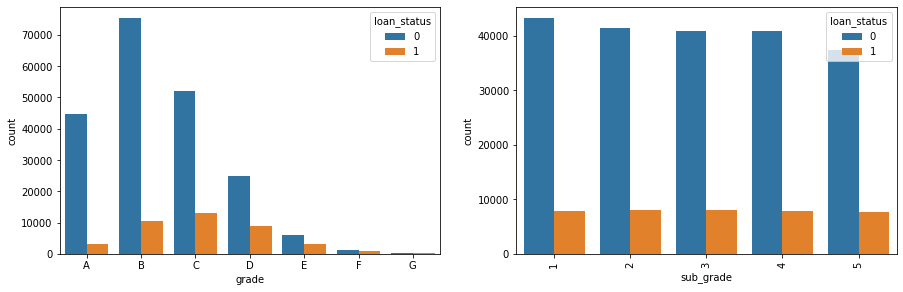

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
grade = sorted(work_df.grade.unique().tolist())
sns.countplot(x='grade', data=work_df, hue='loan_status', order=grade)
plt.subplot(2, 2, 2)
sub_grade = sorted(work_df.sub_grade.unique().tolist())
g = sns.countplot(x='sub_grade', data=work_df, hue='loan_status', order=sub_grade)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

##### **Observation**:
Grades B and C category have high number borrowers

Grades F and G have less borrowers count and interestingly almost paid back the loan

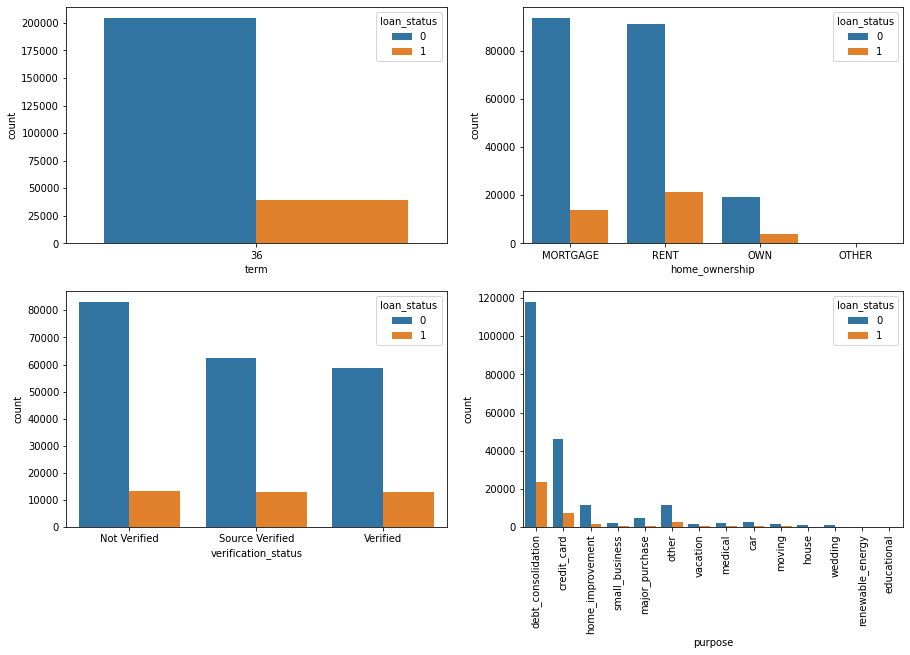

In [ ]:
plt.figure(figsize=(15, 20))
plt.subplot(4, 2, 1)
sns.countplot(x='term', data=work_df, hue='loan_status')
plt.subplot(4, 2, 2)
sns.countplot(x='home_ownership', data=work_df, hue='loan_status')
plt.subplot(4, 2, 3)
sns.countplot(x='verification_status', data=work_df, hue='loan_status')
plt.subplot(4, 2, 4)
g = sns.countplot(x='purpose', data=work_df, hue='loan_status')
g.set_xticklabels(g.get_xticklabels(), rotation=90);

##### **Observation**: 
Majority of the borrowers have gone for 36 months loan duration
Loan taken for the porposes like debt_consolidation, credit card payments, home & small business investments, have high probability of borrowers
Interestingly, though high number of 'Not verified' status have borrowed the loan, their repayment status look good

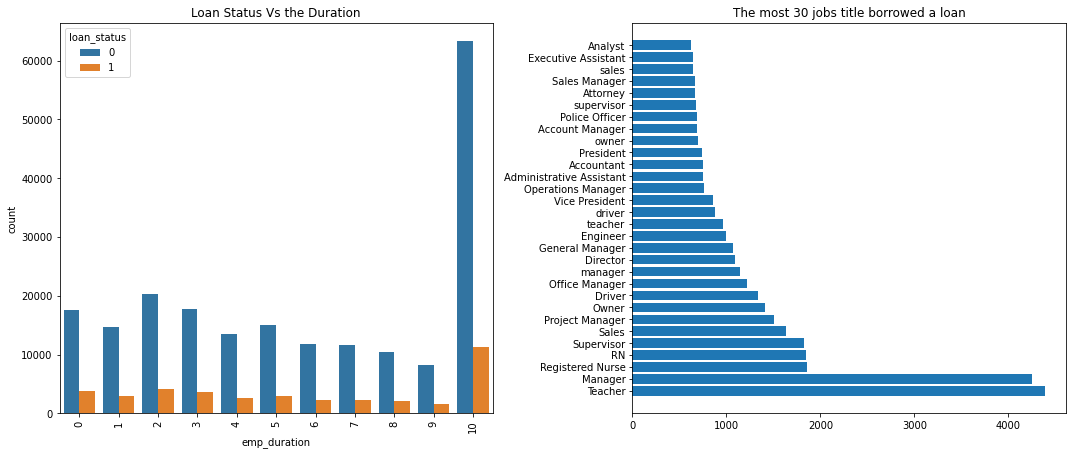

In [ ]:
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
g = sns.countplot(x='emp_duration', data=work_df, hue='loan_status')
g.set_xticklabels(g.get_xticklabels(), rotation=90);
plt.title("Loan Status Vs the Duration")

plt.subplot(2, 2, 2)
plt.barh(data_df.emp_title.value_counts()[:30].index,
         data_df.emp_title.value_counts()[:30])
plt.title("The most 30 jobs title borrowed a loan")
plt.tight_layout()


##### **Obervation**:
Teacher, Manager, Nurse, RN, Supervisor are the Top 5 Professions amongst the borrowers

The people who are employed for 10 yrs are the high number of borrowers

<Figure size 1080x864 with 0 Axes>

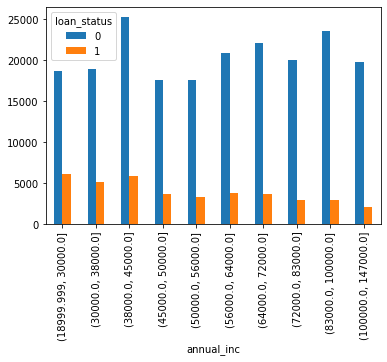

In [ ]:
plt.figure(figsize=(15,12))
pd.crosstab(columns = work_df["loan_status"],
           index=pd.qcut(work_df["annual_inc"],10)).plot(kind="bar")

##### Observation:
The top borrower categroy in terms of annual income falls in 38-40K segment

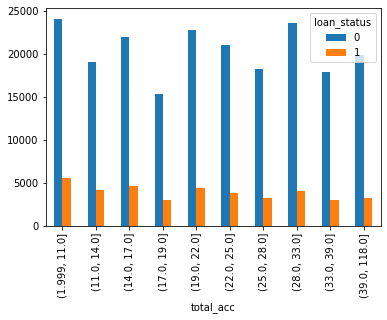

In [ ]:
pd.crosstab(columns = work_df["loan_status"],
           index=pd.qcut(work_df["total_acc"],10)).plot(kind="bar")


INDIVIDUAL    243153
DIRECT_PAY       152
JOINT            149
Name: application_type, dtype: int64


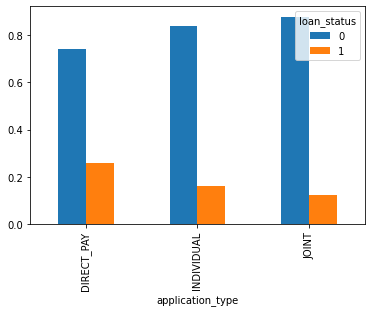

In [ ]:
print(work_df["application_type"].value_counts(dropna=False))

pd.crosstab(index = work_df["application_type"],
            columns= work_df["loan_status"],normalize= "index").plot(kind = "bar")

##### **Observation**: 
'Individuals' category tops in number of borrowers as per application types

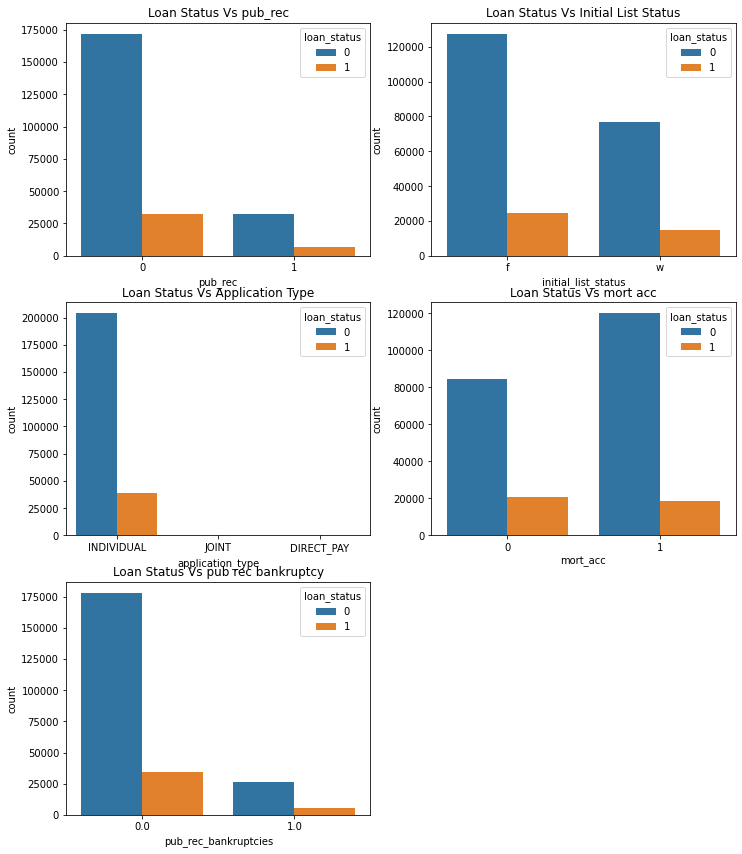

In [ ]:
plt.figure(figsize=(12, 30))
plt.subplot(6, 2, 1)
sns.countplot(x='pub_rec', data=work_df, hue='loan_status')
plt.title("Loan Status Vs pub_rec")
plt.subplot(6, 2, 2)
sns.countplot(x='initial_list_status', data=work_df, hue='loan_status')
plt.title("Loan Status Vs Initial List Status")
plt.subplot(6, 2, 3)
sns.countplot(x='application_type', data=work_df, hue='loan_status')
plt.title("Loan Status Vs Application Type")
plt.subplot(6, 2, 4)
sns.countplot(x='mort_acc', data=work_df, hue='loan_status')
plt.title("Loan Status Vs mort acc")
plt.subplot(6, 2, 5)
sns.countplot(x='pub_rec_bankruptcies', data=work_df, hue='loan_status')
plt.title("Loan Status Vs pub rec bankruptcy")
plt.show()

##### **Observation**: 
Incidently, people with more deregatory records, more public bankruptcie records have the loan status as fully paid in high numbers

The people with more mortgage accounts are in high numbers with pending repayment status

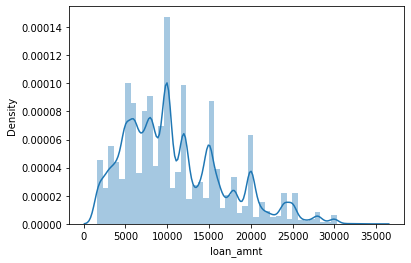

In [ ]:
sns.distplot(work_df['loan_amnt'])

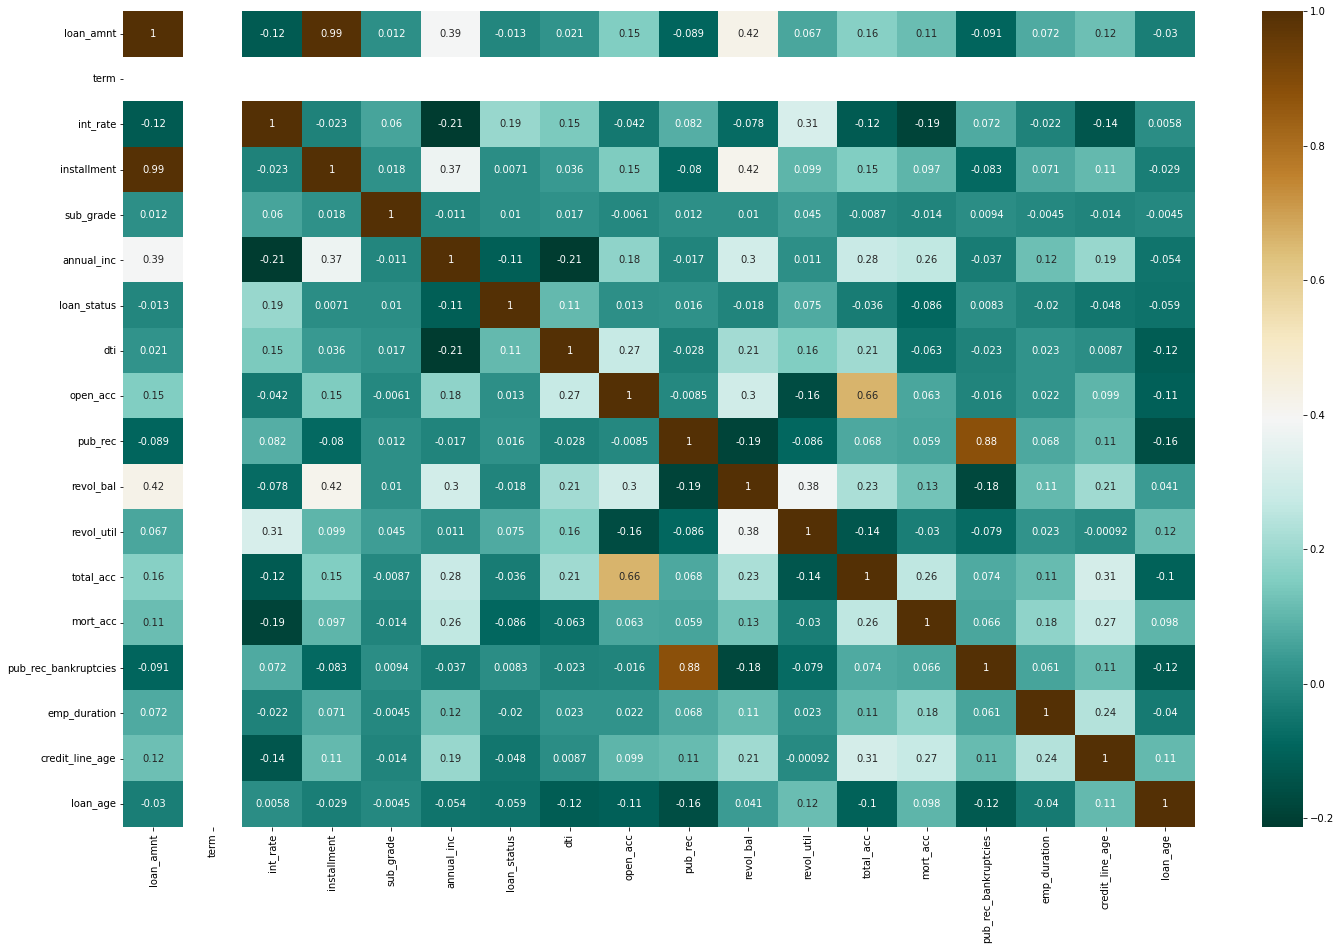

In [ ]:
# Correlation check
plt.figure(figsize=(24,15))
sns.heatmap(work_df.corr(),annot=True,cmap='BrBG_r')

plt.show()

### Encoding Categorical Variables

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
lab_encoder = LabelEncoder()
work_df['loan_status'] = lab_encoder.fit_transform(work_df.loan_status)
work_df['grade'] = lab_encoder.fit_transform(work_df.grade)
work_df['home_ownership'] = lab_encoder.fit_transform(work_df.home_ownership)
work_df['verification_status'] = lab_encoder.fit_transform(work_df.verification_status)

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from category_encoders import TargetEncoder
encoder = TargetEncoder()
work_df['emp_title'] = encoder.fit_transform(work_df['emp_title'], work_df['loan_status'])
work_df['purpose'] = encoder.fit_transform(work_df['purpose'], work_df['loan_status'])

In [ ]:
# Data with no order between categories
temp = pd.get_dummies(work_df, columns=['application_type', 'initial_list_status', 'term'], drop_first=True)
work_df = pd.concat([work_df, temp], axis=1)

work_df.drop(['term', 'initial_list_status', 'application_type'], axis='columns', inplace=True)

### Model building

In [ ]:
# Split the Independent (Input) & Dependent (Target) Variables
X = work_df.drop(['loan_status'], axis=1)
y = work_df['loan_status']
y = y.iloc[:, 1].values

In [ ]:
# Get the Train-Test split
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Logistic Regression on non-standardized data

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
classifier.get_params(deep=True)

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
weight = classifier.coef_
weight

array([[-0.35439649, -0.34884025,  0.42599237,  0.50382102,  0.12713263,
         0.72867242,  0.05890353,  0.02901183, -0.04585802,  0.01832458,
         0.09074298,  0.09461238,  0.00996231, -0.03346158,  0.09989464,
        -0.02195795, -0.02433002, -0.02893309, -0.01899549, -0.01650691,
         0.05160198, -0.35439649, -0.34884025,  0.42599237,  0.50382102,
         0.12713263,  0.72867242,  0.05890353,  0.02901183, -0.04585802,
         0.01832458,  0.09074298,  0.09461238,  0.00996231, -0.03346158,
         0.09989464, -0.02195795, -0.02433002, -0.02893309, -0.01899549,
        -0.01650691,  0.05160198,  0.03491341, -0.00552307, -0.01912935]])

In [ ]:
def logreg_to_dict(clf, feature_names):
  coefs = np.concatenate([clf.intercept_, clf.coef_.squeeze()])
  return dict(zip(["intercept"] + feature_names, coefs))

print(logreg_to_dict(classifier, X.columns.tolist()))


{'intercept': -2.3926974853306184, 'loan_amnt': -0.35439648621925984, 'int_rate': -0.3488402466342704, 'installment': 0.42599236674917385, 'grade': 0.5038210176922596, 'sub_grade': 0.1271326258635427, 'emp_title': 0.7286724217905405, 'home_ownership': 0.05890353096466558, 'annual_inc': 0.029011830578835798, 'verification_status': -0.04585801794596382, 'purpose': 0.018324575773369947, 'dti': 0.09074298194780987, 'open_acc': 0.09461237555154917, 'pub_rec': 0.009962309182153569, 'revol_bal': -0.033461582635030025, 'revol_util': 0.09989463645793052, 'total_acc': -0.021957946596498086, 'mort_acc': -0.024330022317003746, 'pub_rec_bankruptcies': -0.028933094396341216, 'emp_duration': -0.018995485967829275, 'credit_line_age': -0.01650690774502955, 'loan_age': 0.05160198106925419, 'application_type_INDIVIDUAL': 0.03491341092235009, 'application_type_JOINT': -0.0055230706690407765, 'initial_list_status_w': -0.019129353662620672}


In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

array([[39200,  1608],
       [ 3945,  3938]])

In [ ]:
precision_score(y_test, y_pred)

0.710061305445366

In [ ]:
recall_score(y_test, y_pred)

0.4995560065964734

In [ ]:
f1_score(y_test, y_pred)

0.5864919204706233

In [ ]:
# Estimate the probability of belonging to Class 1
probs = classifier.predict_proba(X_test)[:, 1]

0.8793112322758574

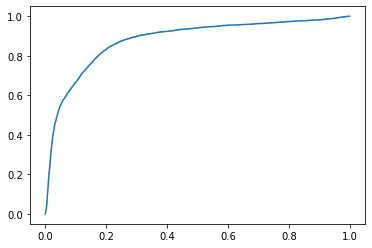

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thres = roc_curve(y_test, probs)
plt.plot(fpr, tpr)
roc_auc_score(y_test, probs)

##### **Observation**:
AUC score is greater than 0.50 which means this model can predict the positive & Negative class well.

# Insights:

*   Loan Term 36 months is more predominant than 60 months
*   Grade B and C has more counts than other grades
*   In terms of Ownership, 'Mortgage' tops the list followed by Rental
*   3/4th of the Customers have fully paid back the loan
*   "Individual" seems to be the popular amongst the application type  
*   Naturally 'Verified' status are high in number than the 'not verified'
*   Grades F and G have less borrowers count and interestingly almost paid back the loan
*   Loan taken for the porposes like debt_consolidation, credit card payments, home & small business investments, have high probability of borrowers
*   Interestingly, though high number of 'Not verified' status have borrowed the loan, their repayment status look good
*   Teacher, Manager, Nurse, RN, Supervisor are the Top 5 Professions amongst the borrowers
*   The people who are employed for 10 yrs are the high number of borrowers
*   The top borrower categroy in terms of annual income falls in 38-40K segment
*   'Individuals' category tops in number of borrowers as per application types
*   Incidently, people with more deregatory records, more public bankruptcie records have the loan status as fully paid in high numbers
*   The people with more mortgage accounts are in high numbers with pending repayment status

# Recommendations & Conclusion

Loan status fully paid seems to be successful in the below criterias:
*   Grade B & C
*   Applicant Type Individual
*   Professions like Teacher, Manager, Staff Nurse
*   Annual Income higher than 30K
*   Lower loan duration like 36 months
*   Employees at the job for longer duration like 10 yrs
*   Applicants with 'verified status'
*   People with less mortgage accounts
